

In this notebook, I aim to create a machine learning model to classify x-rays Images as either pneumonic or normal. I use 14 datasets taken from this study https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5 The dataset can be found https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia?resource=download

I start by previewing the chest x-rays


In [3]:
import os
import random
import matplotlib.pyplot as plt

Sample Images


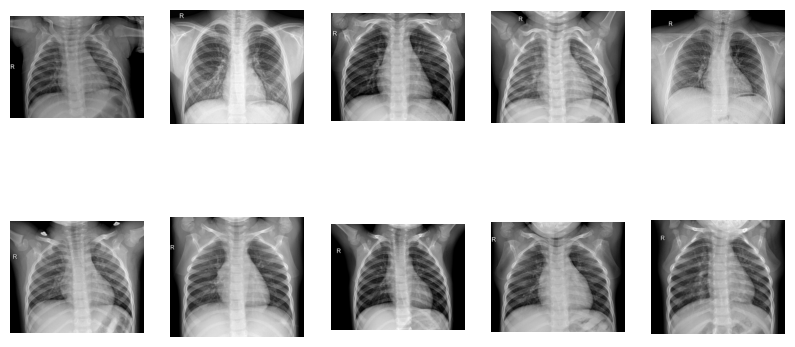

In [13]:
path = '/kaggle/input/pneumonia/chest_xray/train/NORMAL/'
image_files = os.listdir(path)
print('Sample Images')

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img=plt.imread(os.path.join(path, image_files[random.randrange(0, len(image_files))]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
#plt.tight_layout()

# Here, I will use tensorFlow to locate and prepare the images.
A number of things I will do, including scaling of the images. Since images are made of pixels, in the range of 1-255, I will rescale the pixel values between 0 and 1, by dviding the pixel for each image by 255.

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#This is where i normalize the images by diving pixels by 255
train_data_generator = ImageDataGenerator(rescale=1/255)
train_folder = '/kaggle/input/pneumonia/chest_xray/train/'
train_generator = train_data_generator.flow_from_directory(
train_folder, # I am specifying the directory containing train dataset,
target_size=(150, 150), # I am telling the generator to resize images to 150 by 150
batch_size=100,# I want the generator to process the data in batches of 100
class_mode="binary")# basicaly we have two classes, pneumonia and nornmal

Found 5216 images belonging to 2 classes.


# In the next few codes, I will build an AI model to learn from the data.
## I will basicaly build a convolutional neural network

In [13]:
#Here, we will be passing the images through layers, convolutional layers. Each layer has multiple filters or kernel. Each kennel extract 
# certain features from the image, could be  edges, textures, or shapes. Each filter then gives a  2D array called a feature map, which corresponds 
# to a specific learned feature.
from tensorflow.keras import models, layers
model = models.Sequential(
[
    # Models.Sequential initializes an empty sequential object. When we add layers, the trainer will process the data sequencially
    # Output from one layer, will be the input of the next layer.
# Layer 1
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(), # Let us unpack this. layers.Conv2D creates the convolutional layer. THis (16, (3,3) tells the trainer
                            # That we need 16 filters, with each filter learning something different, the, 3,3 tells the size of each filter
                            # in this case, the filter should be of size 3by3 matrix
                            # activation='relu' tells the activation function for this layer. 
                            #ReLU (Rectified Linear Unit) is a commonly used activation function that introduces non-linearity into the network by outputting the input if it's positive, and zero otherwise.
                            # input_shape=(150, 150, 3) implies that our images are of the shape 150 by 150, and the 3 means color channels
                            # 3 channels for RGB images. 
                            #l ayers.MaxPooling2D() This creates a max pooling layer, which is commonly used in CNNs to downsample the feature maps produced by convolutional layers.
    # Layer 2
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    
    #Layer 3
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    
    # Layer 4
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    
    # Layer 5
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),# Combines all features (flattens) for prediction
    layers.Dense(256, activation='relu'), # layers.Dense connects every neuron in the previous layer to every neuron in the current layer.
                                            # The parameter 256 specifies the number of neurons in the dense layer.
    layers.Dense(1, activation='sigmoid') # We are using sigmoid to ensure the prediction will be between 0 and 1
    
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

> The choice between using Conv2D and Conv3D layers in a neural network depends on the dimensionality and nature of the input data. Use Conv2D for 2D image data, where each sample is a 2D matrix representing a single image with height and width dimensions (e.g., grayscale or RGB images). Use Conv3D for 3D volumetric data, where each sample is a 3D array representing a volume with height, width, and depth dimensions (e.g., medical imaging data like MRI or CT scans, video data with temporal information).

### Now that I have built a CNN, I will proceed to train it to differentiate normal and pneumonic X-rays

In [14]:
history = model.fit(
train_generator,
steps_per_epoch= 5216 // 100, # Tells the trainer the total number of batches of 100 requiired to see all 1000 of the training images.
epochs=10) #the number of times the model will get throhg all the images.

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.7464 - loss: 0.5758
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 220us/step - accuracy: 0.8500 - loss: 0.2994
Epoch 3/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


52/52 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.8665 - loss: 0.3009
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 127us/step - accuracy: 0.9700 - loss: 0.1696
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9336 - loss: 0.1741
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 127us/step - accuracy: 0.9500 - loss: 0.1108
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9537 - loss: 0.1165
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 146us/step - accuracy: 0.9200 - loss: 0.1336
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9592 - loss: 0.0955
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 128us/step - accuracy: 0.9900 - loss: 0.0575


# I will then evaluate my model's performance using test images

In [34]:
from tensorflow.keras.preprocessing import image
import os
import numpy as np
test_images = os.listdir('/kaggle/input/test-data/test/')
for imag in test_images:
    path = '/kaggle/input/test-data/test/' + imag
    test_img = image.load_img(path, target_size = (150, 150)) # We are resizing to the image size we used for training
    img = image.img_to_array(test_img)
    img /= 255.0 # To normaluize the images
    img = np.expand_dims(img, axis =0)
    prediction = model.predict(img)

    print(f"Prediction: {prediction[0]}")

    if prediction[0] < 0.5:
        print(imag + " is normal")
    else:
        print(imag + " is pneumonia")
    print('\n')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction: [0.9017265]
person152_bacteria_724.jpeg is pneumonia


